In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,KFold,train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report
import xgboost as xgb

In [3]:
df=pd.read_csv("F:\Assignment\Csv\datasets_diabetesUC.csv")
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# checking for datatypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null object
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [4]:
df['Pregnancies'].unique()
df['Pregnancies']=df['Pregnancies'].replace('Ten','10')
#Converting Pregnancies feature into int type
df['Pregnancies']=df['Pregnancies'].astype('int')
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [5]:
df.describe()#statistical overview of data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Checking for outliers

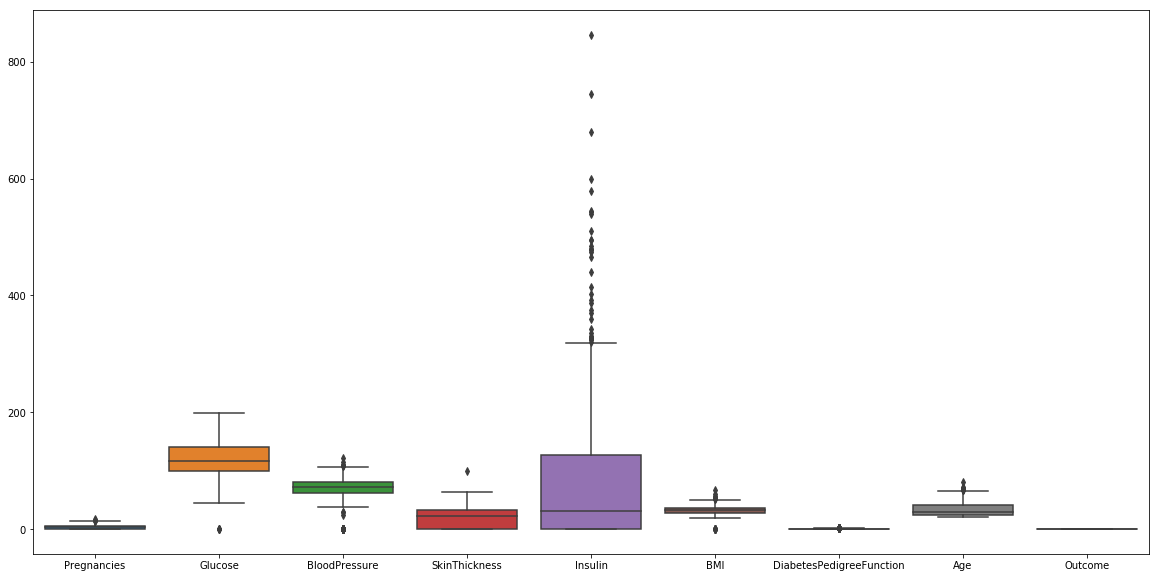

In [6]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
# insulin columns contains more outliers

318.125
(768, 9)


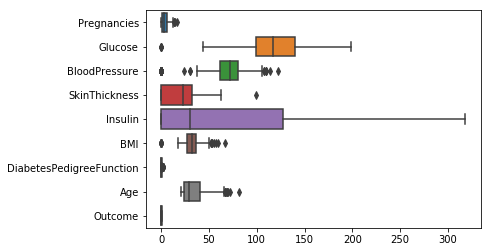

In [7]:
q75,q25=np.percentile(df['Insulin'],[75,25])
# Calculating IQR
iqr=q75-q25
whisker=q75+(1.5*iqr)
print(whisker)
#Capping the outliers to the upperwhisker value
df['Insulin']=df['Insulin'].clip(upper=whisker)
sns.boxplot(data=df,orient='h')
print(df.shape)


# Handling Null values

In [15]:
# As null values are present as '0', checking the total count of '0'
a=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
print((df.iloc[:,1:6 ] == 0).sum())
# Replacing 0 with np.NaN to make sure the values are null
df.iloc[:, 1:6] = df.iloc[:,1:6].replace(0, np.NaN)
# Dropping if the columns have more than 40% null values
df = df.loc[:, df.isnull().mean() < .5]
# Dropping the rows having more than 40% null values
df= df.loc[df.isnull().mean(axis=1) < .4, :]
print("Shape after dropping null values",df.shape)
df.head()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64
Shape after dropping null values (761, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
# Filling all nan values by mean
df.iloc[:,1:6]=df.iloc[:,1:6].fillna(df.iloc[:,1:6].median())
df.isnull().sum()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Visualization of Features

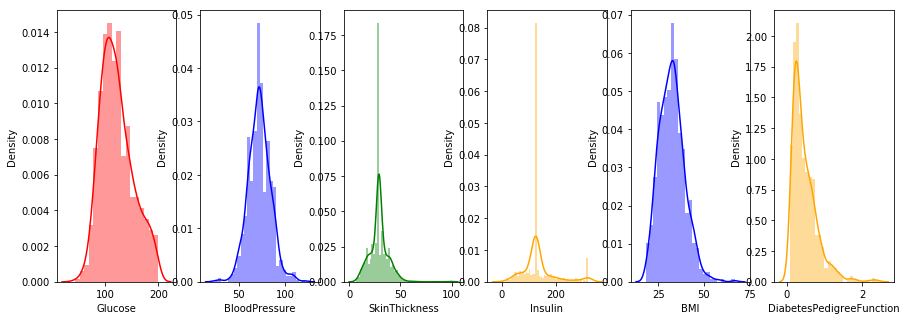

In [18]:
#x.hist(figsize=(20,15))
#plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,6,1)
sns.distplot(df['Glucose'],color='red')

plt.subplot(1,6,2)
sns.distplot(df['BloodPressure'],color='blue')

plt.subplot(1,6,3)
sns.distplot(df['SkinThickness'],color='green')

plt.subplot(1,6,4)
sns.distplot(df['Insulin'],color='orange')
plt.subplot(1,6,5)
sns.distplot(df['BMI'],color='blue')
plt.subplot(1,6,6)
sns.distplot(df['DiabetesPedigreeFunction'],color='orange')
#here most featrures are right skewed

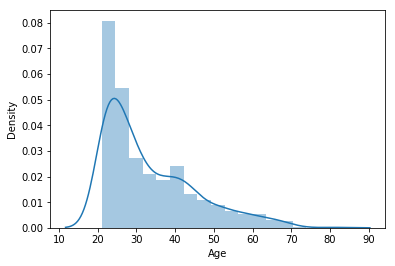

In [8]:
sns.distplot(df['Age'])
#Mostpeoples are age between 20 t0 60

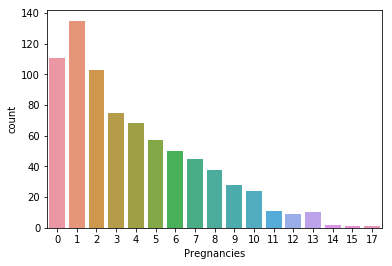

In [11]:
sns.countplot(df['Pregnancies']) 

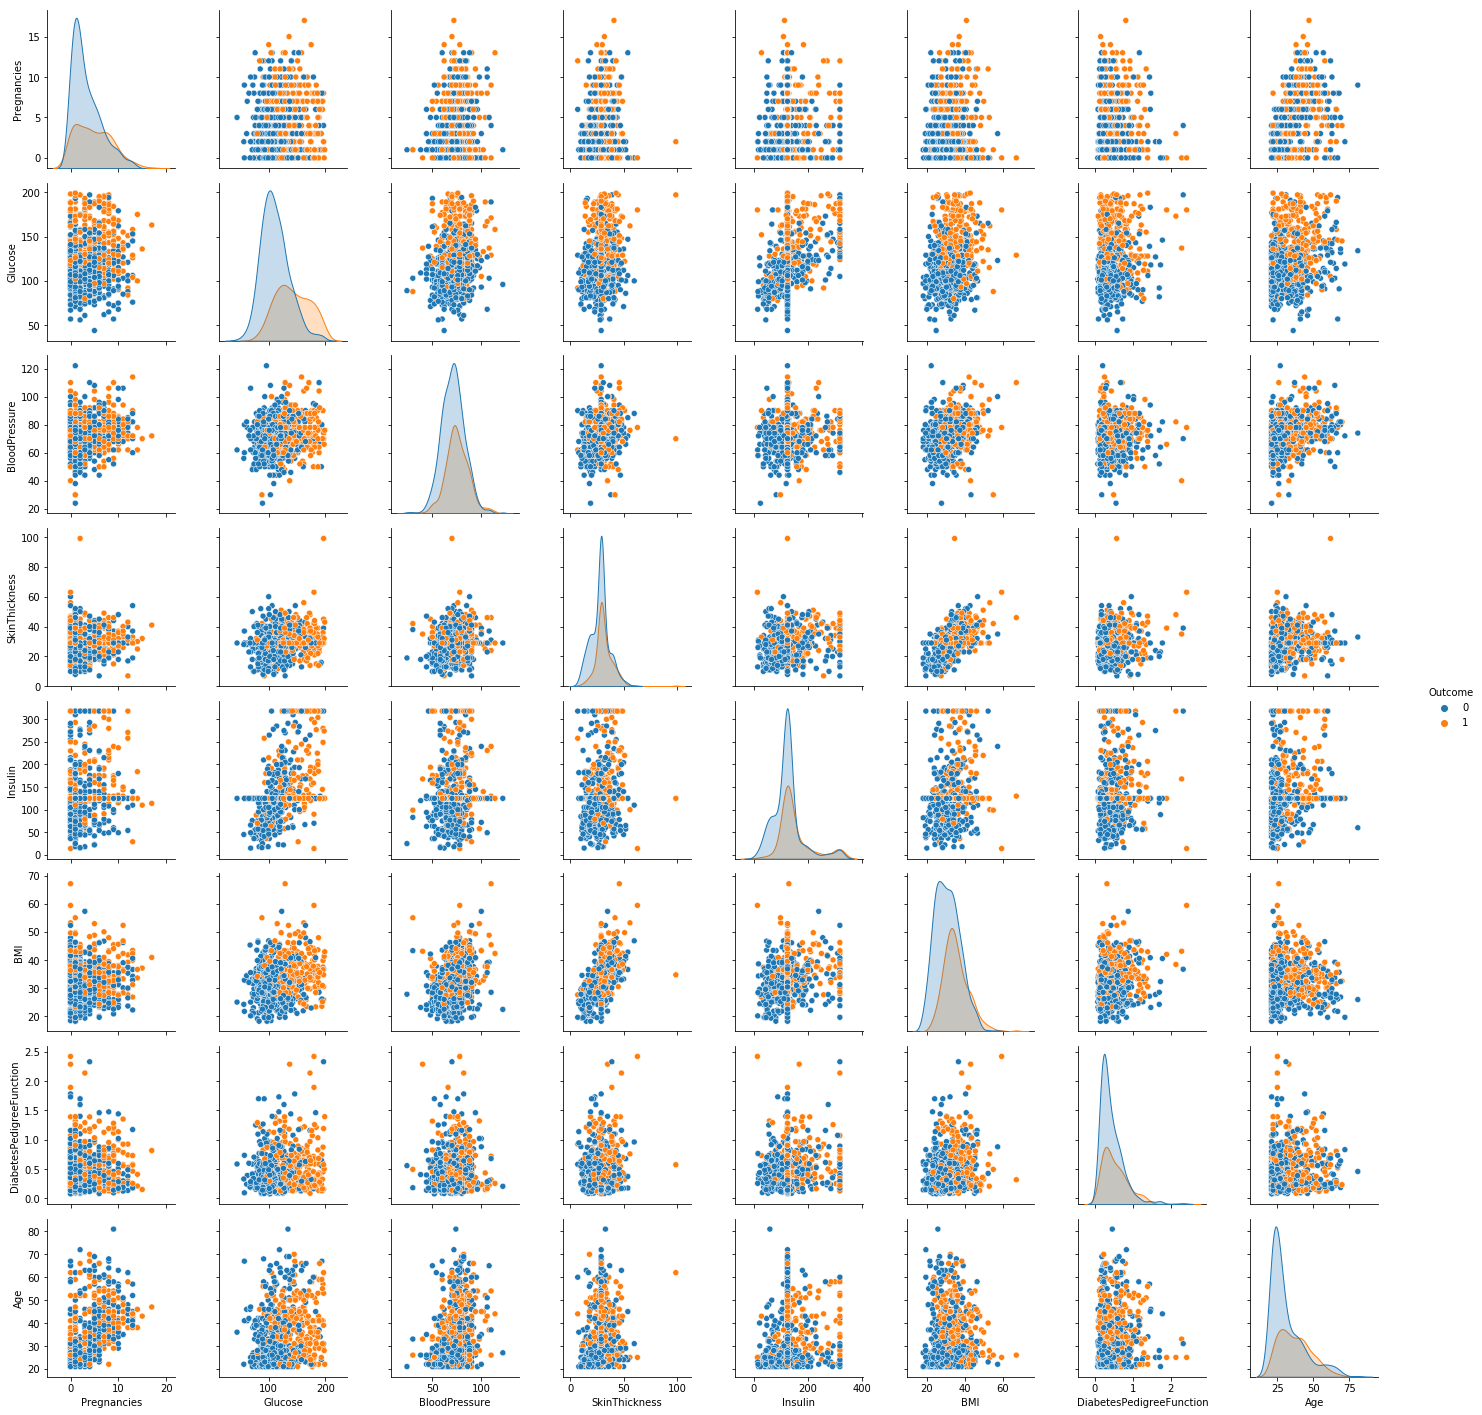

In [19]:

sns.pairplot(data=df,hue='Outcome')

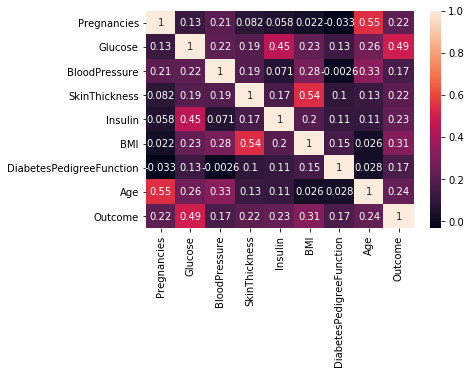

In [20]:
sns.heatmap(df.corr(),annot=True)

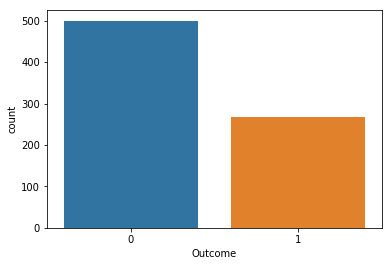

In [14]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']
# Checking for imbalance dataset
df['Outcome'].value_counts() # this is not imba;lanced dataset
sns.countplot(df['Outcome'])

In [23]:
# Standardizing/Normalizing the variable using MinMaxsclaer - Bringing down the value between [0,1] 
x= StandardScaler().fit_transform(x)

In [49]:
#Train_Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(608, 8) (153, 8) (608,) (153,)


# Building Models

In [92]:

# Create model test harness

models = [('LR', LogisticRegression(C=10)),('KNN',KNeighborsClassifier(n_neighbors=5)),('DTREE', DecisionTreeClassifier(random_state=42)),
          ('RF',RandomForestClassifier(n_estimators=100,random_state=None)),('XGBoost', xgb.XGBClassifier(n_estimators=50,
         learning_rate=0.1, random_state=None)),
         ('Adaboost', AdaBoostClassifier(n_estimators=50, random_state=None)),('gb_boost',GradientBoostingClassifier(
         n_estimators=50, learning_rate=0.1, random_state=None)),
         ]

# Evaluate data on test harness
results = []
names = []
num_folds = 10
scoring = 'accuracy'
print("Trainning  and Test Accuracy Of Models :")
for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    test_score=accuracy_score(y_test,pred)
    results.append(cv_results)
    names.append(name)
    print('%s: %f %f (%f)' % (name, cv_results.mean(), test_score,cv_results.std()))

Trainning  and Test Accuracy Of Models :
LR: 0.753497 0.816993 (0.060705)
KNN: 0.712350 0.771242 (0.076422)
DTREE: 0.694208 0.777778 (0.069127)
RF: 0.755164 0.777778 (0.059265)
XGBoost: 0.756803 0.843137 (0.061221)
Adaboost: 0.743497 0.784314 (0.073606)
gb_boost: 0.763415 0.803922 (0.065607)


# We can see here Logistic Regression,XGBoost and GradientBoosting performs well. Tunning Hyperparameter:

## XGBoost Tunning

In [102]:
xg=xgb.XGBClassifier()
params={'min_child_weight':[i for i in range(10)],'max_depth':[i for i in range(3,10)],'gamma':[i/10.0 for i in range(0,5)],
        'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],'learning_rate':[0.1,0.01,0.001,0.15],
    'n_estimators':[15,20,50,100,130,200]
    
}
random_search=RandomizedSearchCV(xg,param_distributions=params,n_iter=5,cv=5).fit(x_train,y_train)
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=130, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

[[90 12]
 [19 32]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       102
           1       0.73      0.63      0.67        51

    accuracy                           0.80       153
   macro avg       0.78      0.75      0.76       153
weighted avg       0.79      0.80      0.79       153



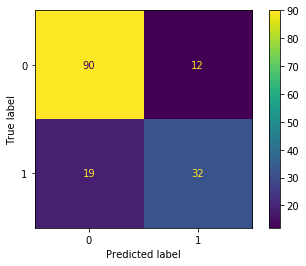

In [112]:
xg=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=7,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=130, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None).fit(x_train,y_train)
pred=xg.predict(x_test)
print(plot_confusion_matrix(xg,x_test,y_test))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

# Tunning Gradient Boosting

In [130]:
gb=GradientBoostingClassifier()
params={'n_estimators':range(50,300,10),'max_depth':range(3,15),'min_samples_split'
        :range(1,20), 'min_samples_leaf':range(1,20),'max_features':range(5,20),'learning_rate':[0.1,0.001,0.05,0.15]}
random_search=RandomizedSearchCV(gb,param_distributions=params,n_iter=5,cv=5).fit(x_train,y_train)
random_search.best_estimator_

GradientBoostingClassifier(max_depth=10, max_features=5, min_samples_leaf=15,
                           min_samples_split=5, n_estimators=50)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       102
           1       0.70      0.76      0.73        51

    accuracy                           0.81       153
   macro avg       0.79      0.80      0.79       153
weighted avg       0.82      0.81      0.81       153



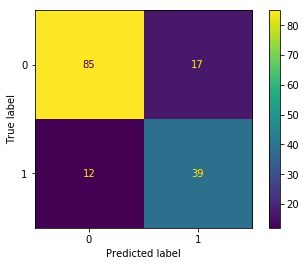

In [131]:
gb=GradientBoostingClassifier(max_depth=10, max_features=5, min_samples_leaf=15,
                           min_samples_split=5, n_estimators=50).fit(x_train,y_train)
pred=gb.predict(x_test)
print(plot_confusion_matrix(gb,x_test,y_test))
print(classification_report(y_test,pred))
